In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.display.max_columns = 300

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# null data check

In [5]:
for col in df_train.columns:
    msg = 'column: {:>10} Percent of NaN value : {:.2f}%'.format(
        col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0])
    print(msg)

column: PassengerId Percent of NaN value : 0.00%
column:   Survived Percent of NaN value : 0.00%
column:     Pclass Percent of NaN value : 0.00%
column:       Name Percent of NaN value : 0.00%
column:        Sex Percent of NaN value : 0.00%
column:        Age Percent of NaN value : 19.87%
column:      SibSp Percent of NaN value : 0.00%
column:      Parch Percent of NaN value : 0.00%
column:     Ticket Percent of NaN value : 0.00%
column:       Fare Percent of NaN value : 0.00%
column:      Cabin Percent of NaN value : 77.10%
column:   Embarked Percent of NaN value : 0.22%


In [6]:
for col in df_test.columns:
    msg = 'column: {:>10} Percent of NaN value : {:.2f}%'.format(
        col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0])
    print(msg)

column: PassengerId Percent of NaN value : 0.00%
column:     Pclass Percent of NaN value : 0.00%
column:       Name Percent of NaN value : 0.00%
column:        Sex Percent of NaN value : 0.00%
column:        Age Percent of NaN value : 19.87%
column:      SibSp Percent of NaN value : 0.00%
column:      Parch Percent of NaN value : 0.00%
column:     Ticket Percent of NaN value : 0.00%
column:       Fare Percent of NaN value : 0.00%
column:      Cabin Percent of NaN value : 77.10%
column:   Embarked Percent of NaN value : 0.22%


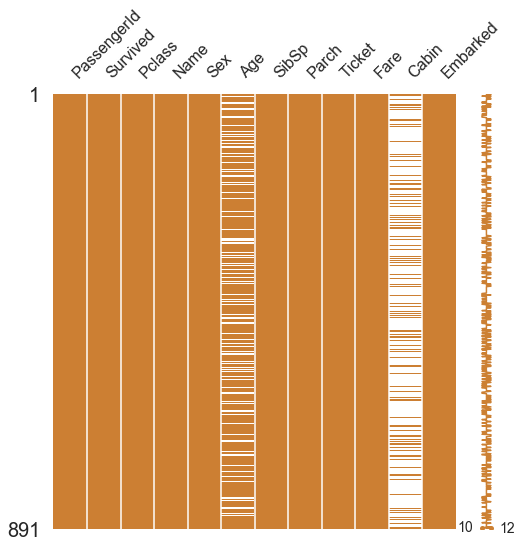

In [7]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

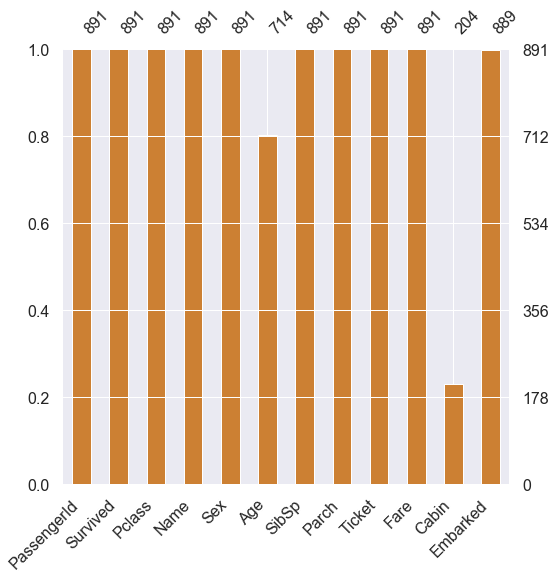

In [8]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

# target label 확인

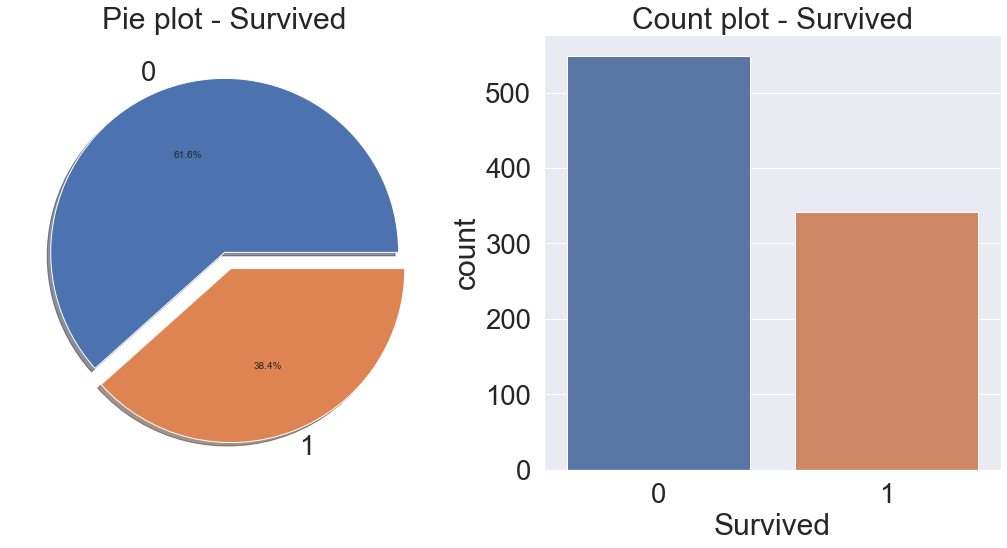

In [9]:
f, ax = plt.subplots(1,2,figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# EDA

## Pclass

In [10]:
# pclass별 사망자
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# pclass 별 생존자
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 한번에 표시
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


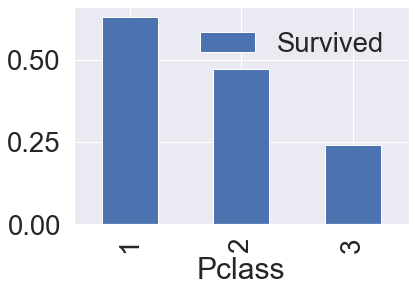

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(
    by='Survived', ascending=False).plot.bar()

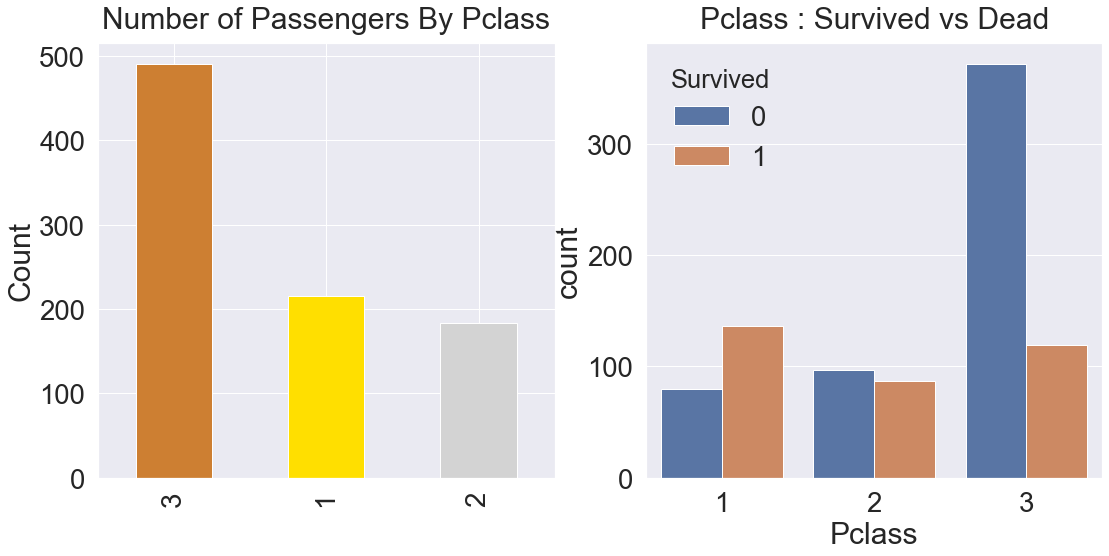

In [14]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

## sex 

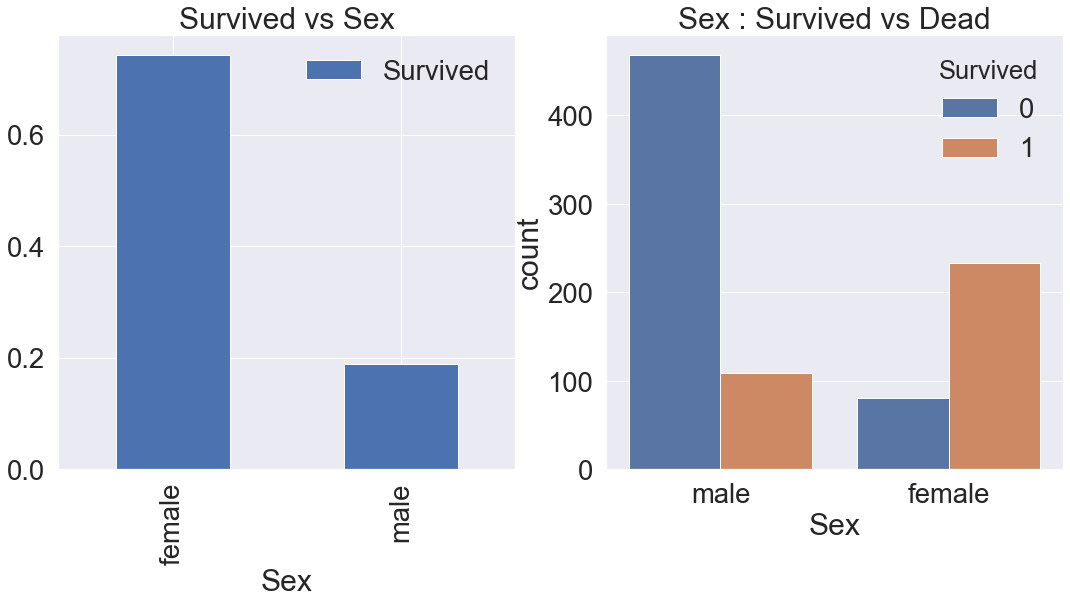

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [16]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',
                                                                                 ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
# margins=True 옵션을 통해 전체(ALL) 카운트 추가
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Both Sex and Pclass

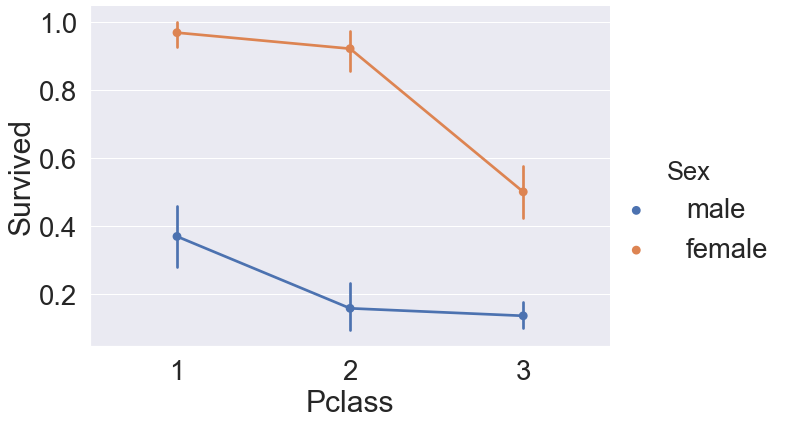

In [18]:
# factorplot : 그룹간(성별) 두가지 속성을 비교할 때
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

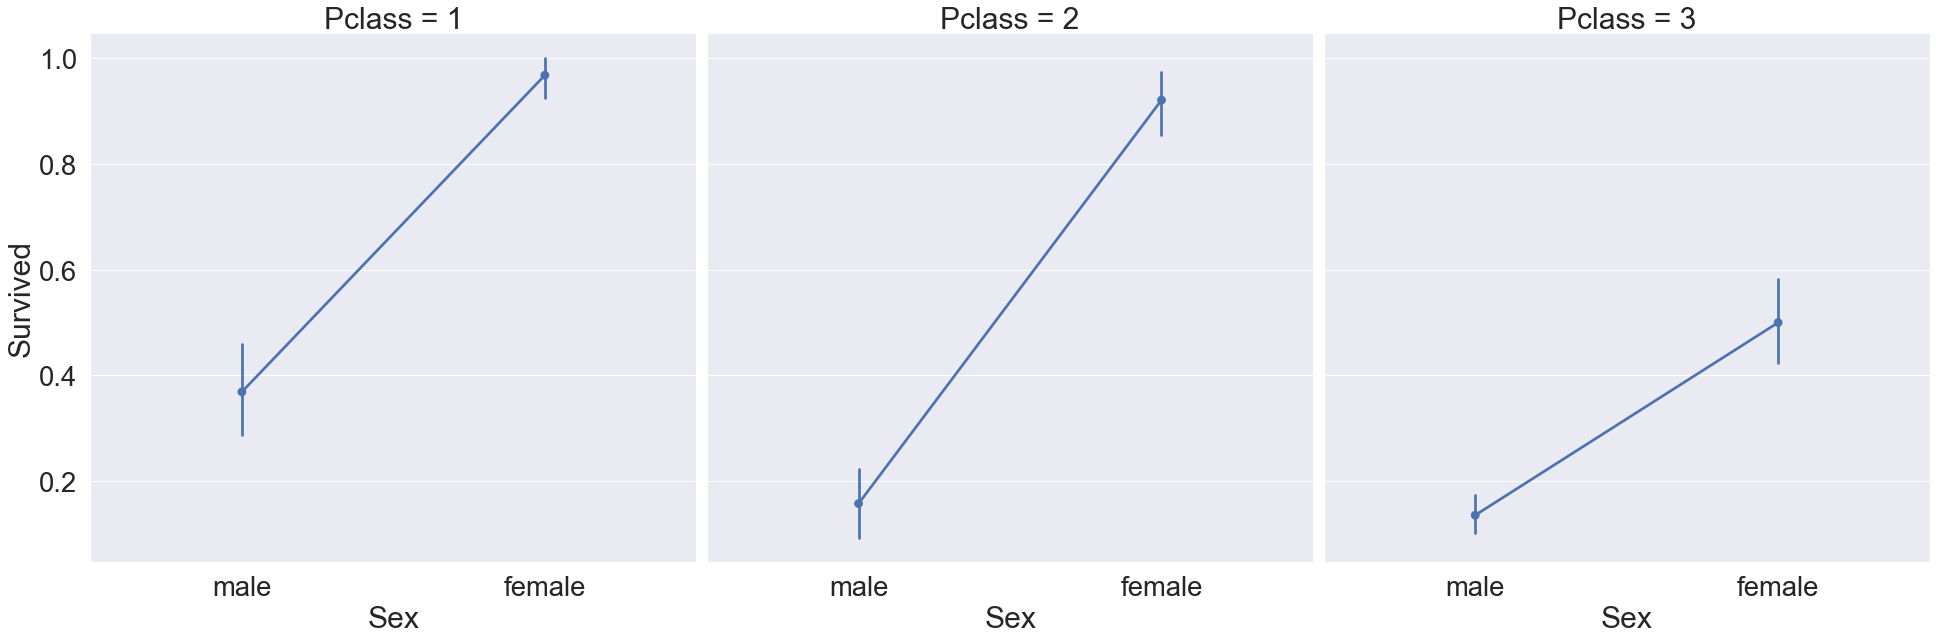

In [19]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train,
              satureation=.5, size=9, aspect=1)

## Age

In [20]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균나이 : 29.7 Years


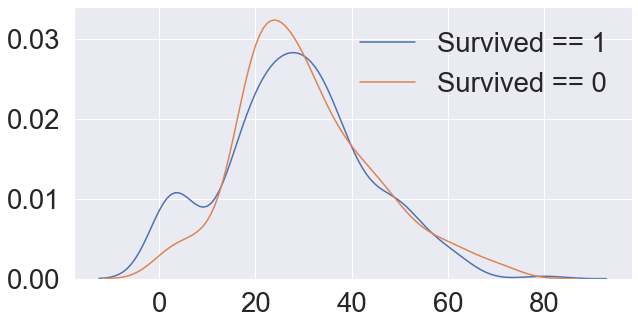

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

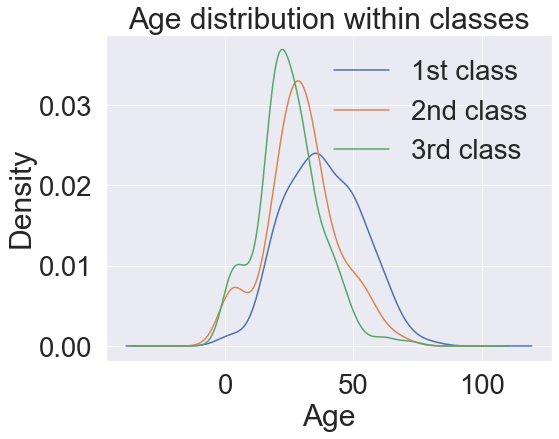

In [22]:
plt.figure(figsize = (8,6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

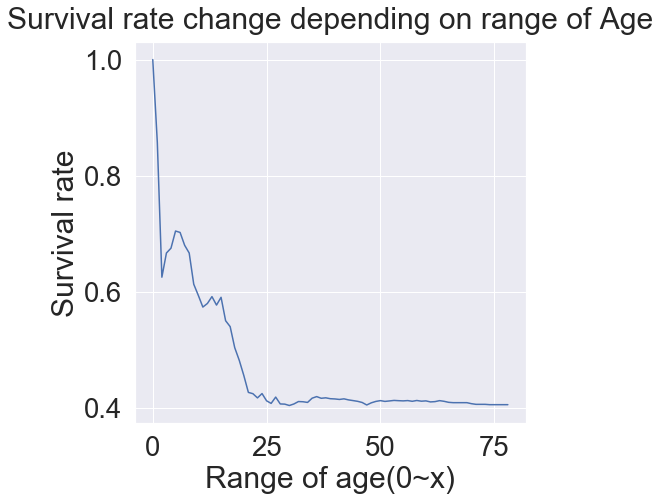

In [23]:
# 나이가 변하면서 생존률이 어떻게 되는지 확인

cummulate_survival_ratio=[]

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of age(0~x)')
plt.show()

## pclass, sex, age

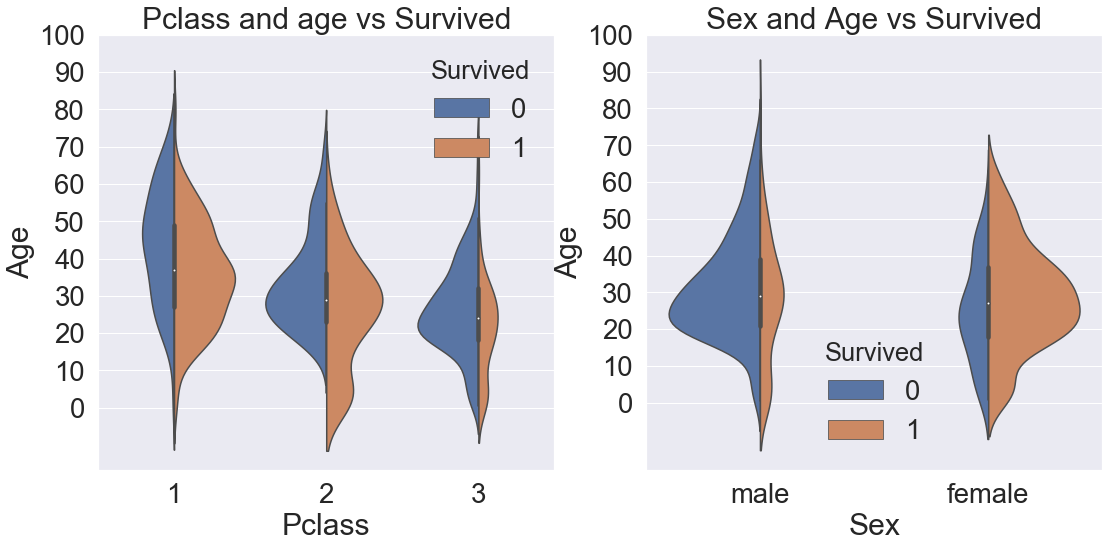

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot("Pclass",'Age', hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex","Age",hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## Embarked

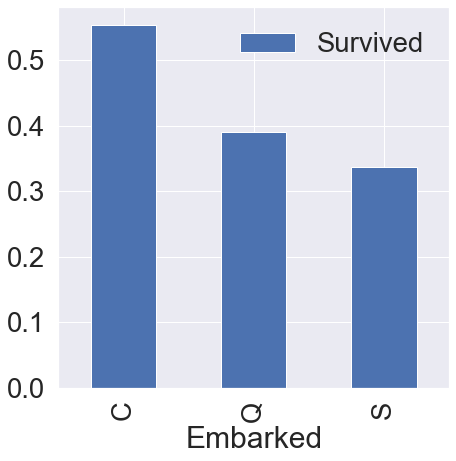

In [25]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby([
    'Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

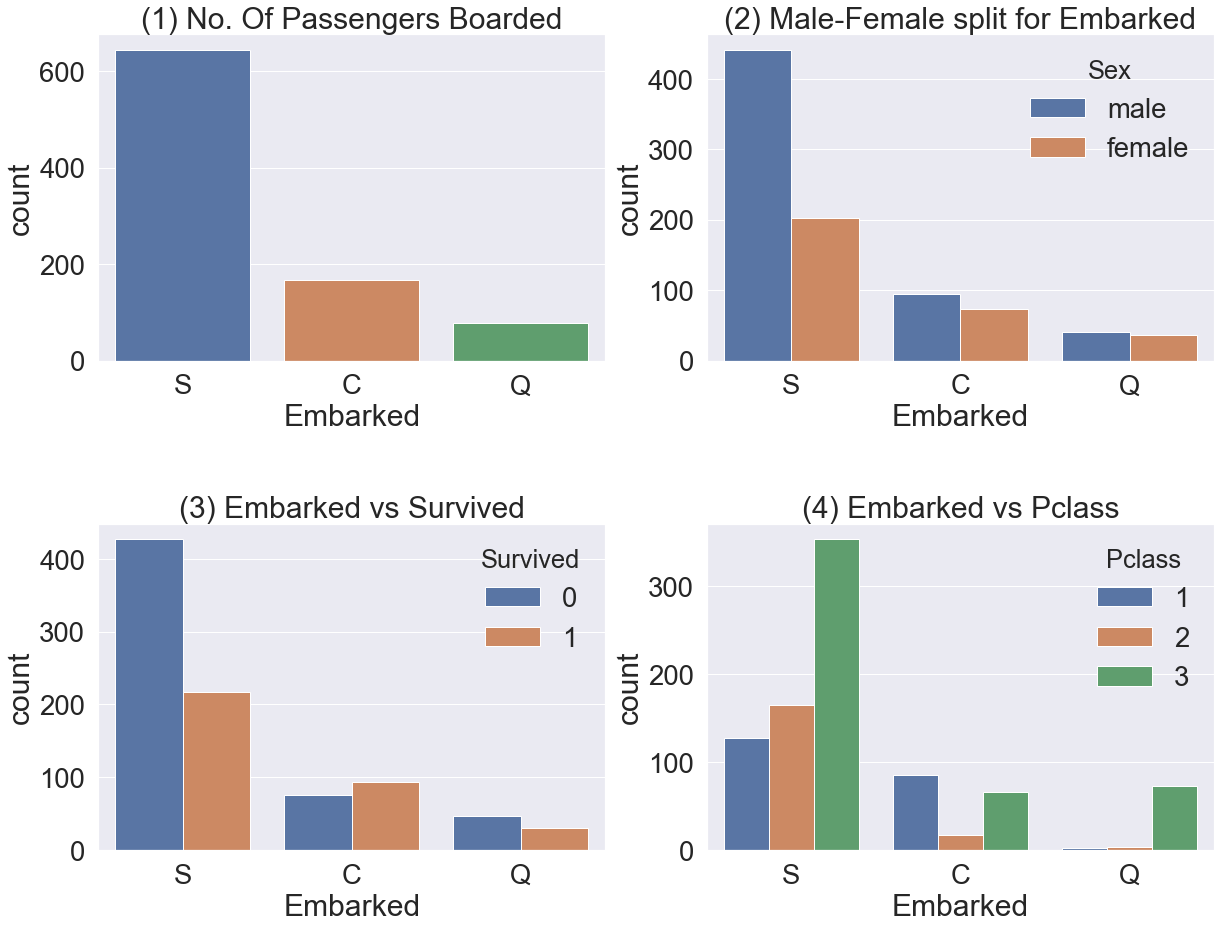

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

# 그래프 간격조정
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## family (Sibsp + Parch)

In [27]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [28]:
print("Maximum size of family :", df_train['FamilySize'].max())
print("Maximum size of family :", df_train['FamilySize'].min())

Maximum size of family : 11
Maximum size of family : 1


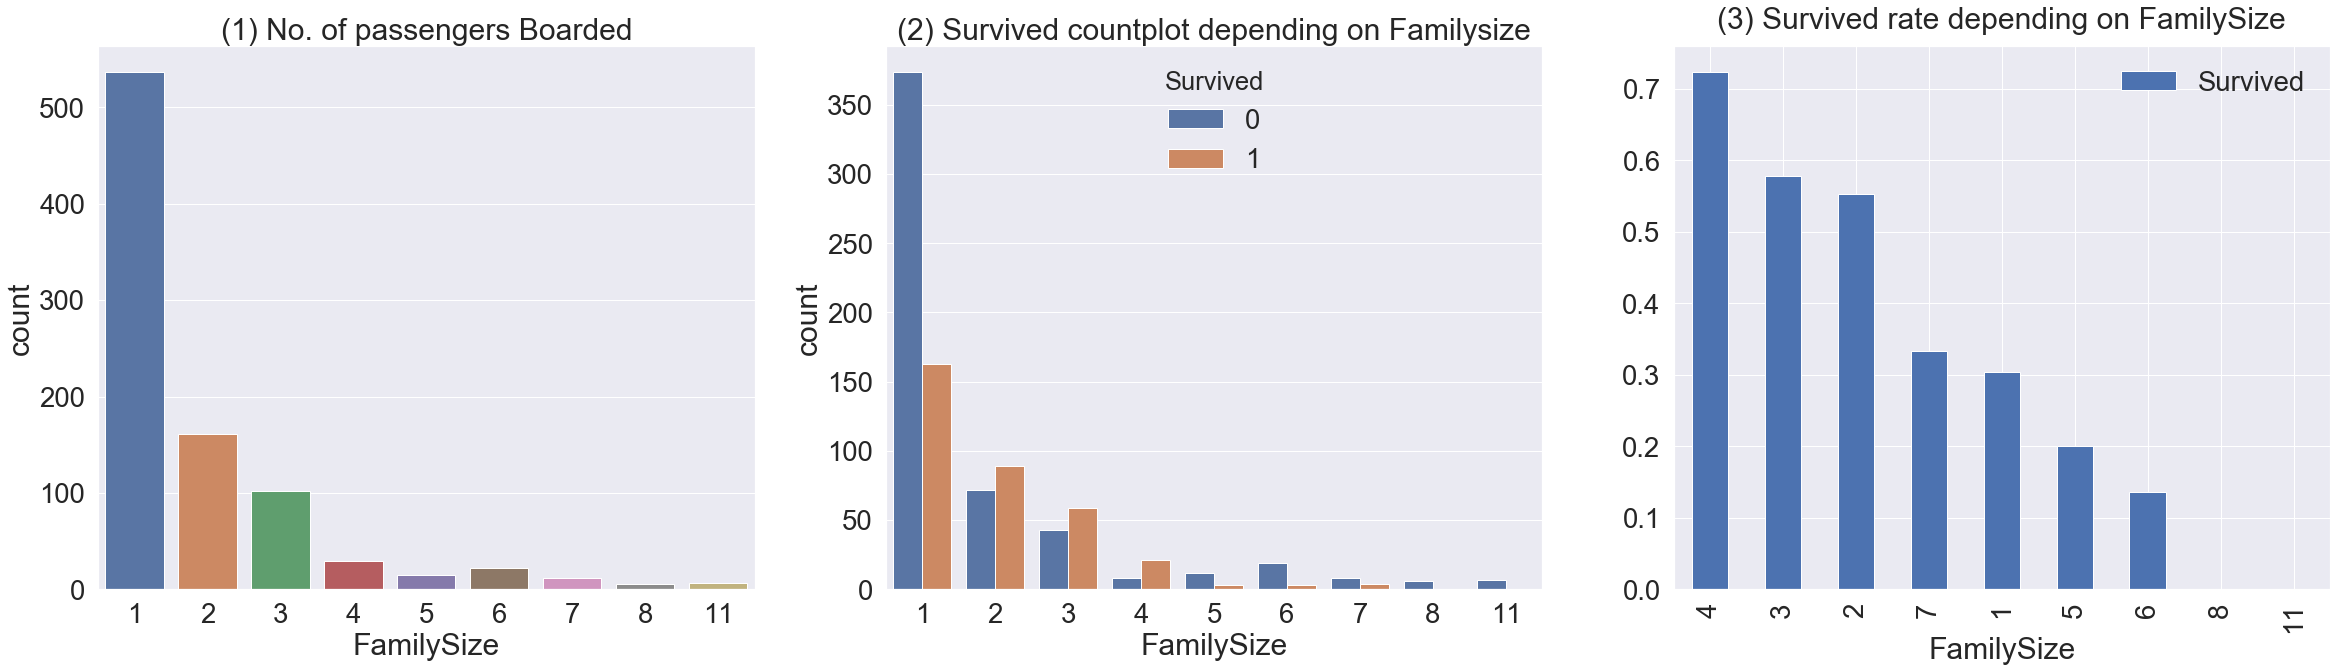

In [29]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Familysize')

df_train[['FamilySize','Survived']].groupby(['FamilySize'],
                                            as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

## fare

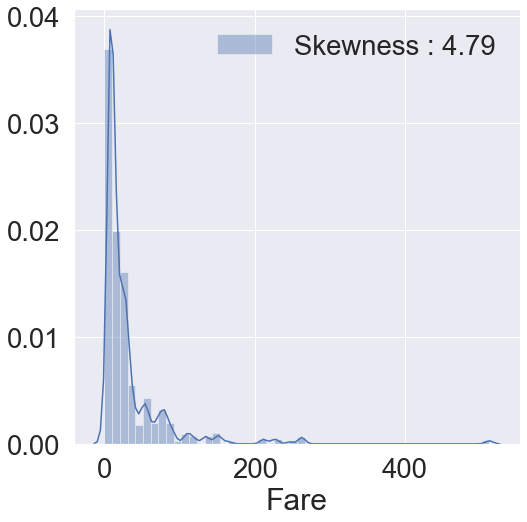

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

sns.distplot(df_train['Fare'], color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
plt.legend(loc='best')

In [31]:
# fare 데이터에 log 함수 처리하여 비대칭성을 완화

# testset 에 있는 nan value 를 평균값으로 치환합니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i> 0 else 0)

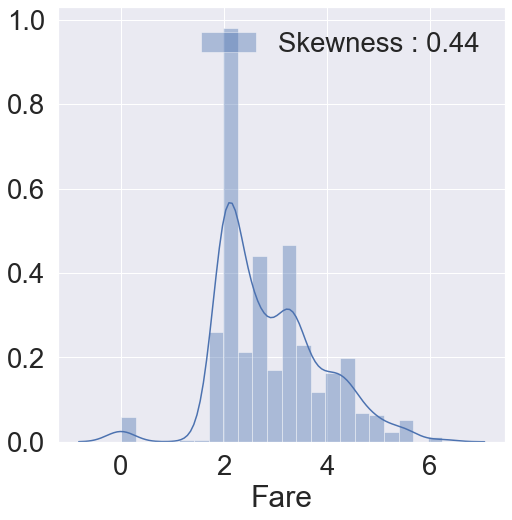

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
plt.legend(loc='best')

## Cabin, Ticket
 - cabin : 결측치가 대략 80%이므로 피쳐에서 삭제
 - Ticket : 전처리를 사용해야 활용 가능

In [33]:
df_train['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
           ..
111369      1
17465       1
348121      1
250648      1
347067      1
Name: Ticket, Length: 681, dtype: int64

# Feature Engineering
 - data set 에 존재하는 null data를 채우기
 - 실제 모델 학습에 쓰이므로, train뿐 아니라 test에도 똑같이 적용

## Fill Null

### Fill null in age usin Title
- column:        Age Percent of NaN value : 19.87%
- Miss, Mrr, Mrs 같은 title이 존재합니다. 각 탑승객의 이름의 title을 사용하여 보간

In [34]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [35]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')  

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [36]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [37]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


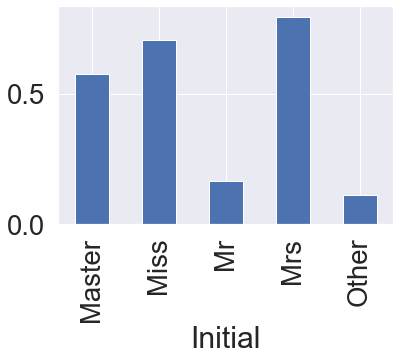

In [38]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [39]:
# age 평균을 통해 null value를 채우기
# loc + boolean + column을 통해 치환

df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33 
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33 
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5

### Fill null in Embarked

In [40]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


In [41]:
df_train['Embarked'].fillna('S', inplace=True)

### change Age (categorical)

In [42]:
# loc를 사용
df_train['Age_cat'] = 0

df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0

df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [43]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

- 이를 확인하기 위해 Series 간 boolean 비교 후 all() 메소드를 사용합시다. all() 메소드는 모든 값이 True 면 True, 하나라도 False 가 있으면 False 를 줍니다.

In [44]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ',(df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [45]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### Change initial, Embarked and Sex (numerical)
 - initial을 인식할 수 있도록 수치화

In [46]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [47]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q':1, 'S':2})

In [49]:
# 둘 중 하나라도 null 값이 있으면 true를 반환
df_train['Embarked'].isnull().any()

False

In [50]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [51]:
df_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

## feature 간 상관관계

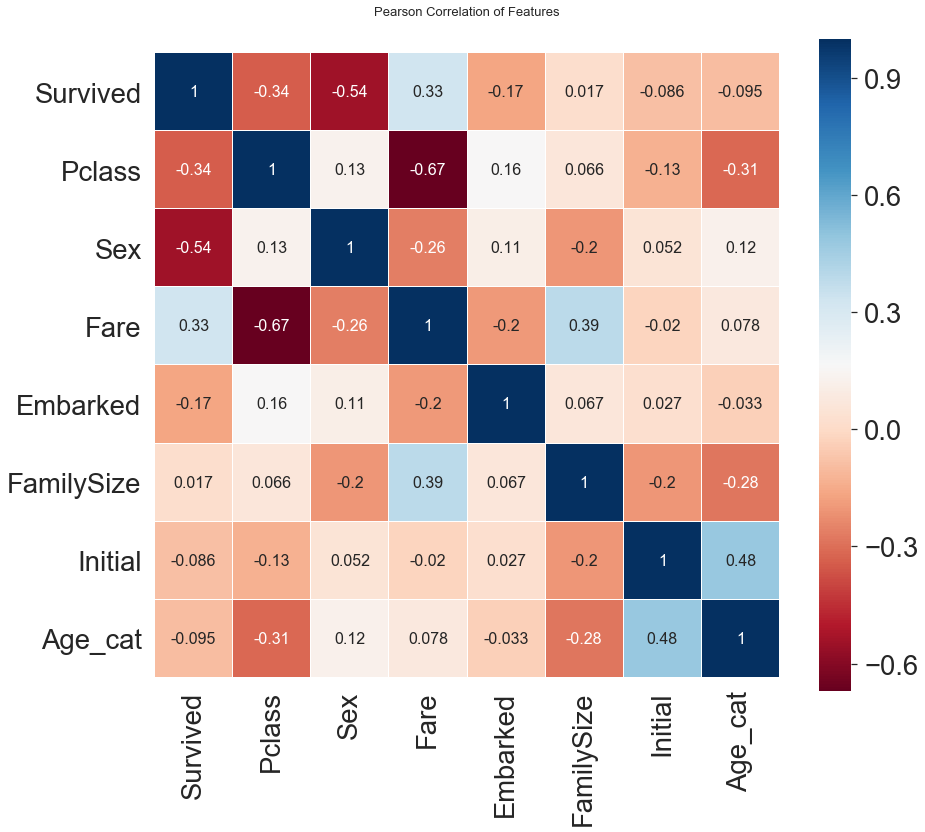

In [52]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked',
                        'FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=13)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1,
           vmax=1.0, square=True, cmap=colormap, linecolor='white',
           annot=True, annot_kws={"size" : 16})

# del heatmap_data

# Data preprocessing

## one-hot encoding on initial and embarked

In [53]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [55]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## drop columns

In [56]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
              axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],
              axis=1, inplace=True)

In [57]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [58]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# Builidng ML model and prediction using the trained model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## split dataset into train, vaid, test set

In [60]:
# 학습에 쓰일 데이터, targer label 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [61]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## model generation and prediction

In [62]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [63]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞춤


## feature importance

In [64]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

Text(0, 0.5, 'Feature')

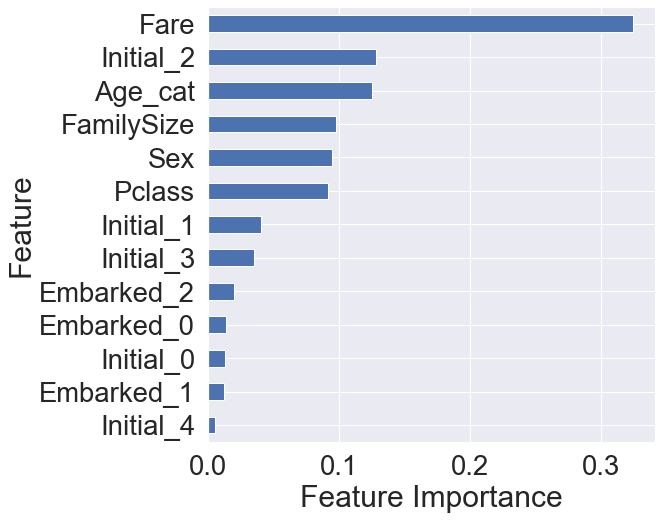

In [65]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

## prediction on Test set

In [66]:
submission = pd.read_csv('gender_submission.csv')

In [67]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [68]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [69]:
submission.to_csv('./my_first_submission.csv', index=False)